### Importing the libraries

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Importing the data

In [56]:
uploaded = files.upload()
dataset_train= pd.read_csv(io.BytesIO(uploaded['HSBC.csv']))

In [57]:
dataset_train.shape

(1259, 7)

In [58]:
dataset_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-27,40.250000,40.270000,40.080002,40.119999,30.339539,917300
1,2015-11-30,39.990002,40.040001,39.799999,39.900002,30.173164,1650100
2,2015-12-01,40.650002,40.740002,40.439999,40.650002,30.740339,1896800
3,2015-12-02,40.419998,40.540001,40.029999,40.130001,30.347105,1623500
4,2015-12-03,40.310001,40.360001,39.529999,39.660000,29.991682,2949000
...,...,...,...,...,...,...,...
1254,2020-11-19,25.139999,25.389999,25.020000,25.379999,25.379999,2017100
1255,2020-11-20,25.320000,25.430000,25.200001,25.270000,25.270000,1933100
1256,2020-11-23,25.459999,25.620001,25.459999,25.610001,25.610001,2687600
1257,2020-11-24,26.160000,26.709999,26.160000,26.660000,26.660000,5645200


### Visualization

In [59]:
df_viz=dataset_train.copy()

In [60]:
df_viz['Date'] = pd.to_datetime(df_viz['Date'])


In [61]:
df_viz.index = df_viz["Date"]


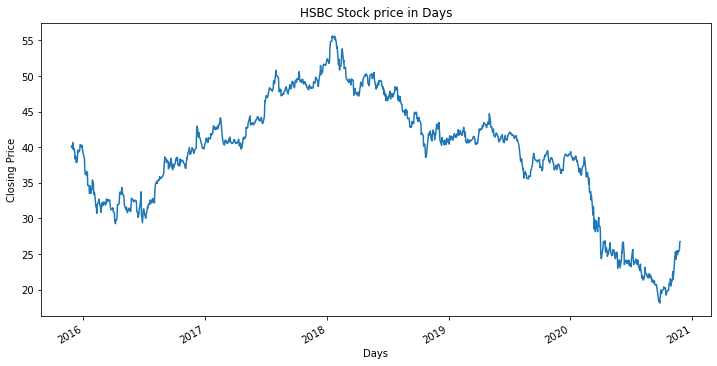

In [64]:
df_viz["Close"].plot(figsize = (12,6))
plt.xlabel("Days")
plt.ylabel("Closing Price")
plt.title("HSBC Stock price in Days")
plt.show()

### Setting train data

In [ ]:
training_set = dataset_train.iloc[:, 4:5].values

In [ ]:
training_set

array([[40.119999],
       [39.900002],
       [40.650002],
       ...,
       [25.610001],
       [26.66    ],
       [26.75    ]])

### Normalizing the data

In [ ]:
#scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Setting 60 timestep as features and 1 as output

In [ ]:
X_train = []
y_train = []
for i in range(60, 1259):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
y_train

array([0.35617165, 0.37509997, 0.36416955, ..., 0.19994669, 0.2279392 ,
       0.23033856])

### Reshaping the feature

In [ ]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


### Import deep learning models

In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Defining the model

In [ ]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 80, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 80, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 80, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 80))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Running the model

In [ ]:
regressor.fit(X_train, y_train, epochs = 200, batch_size = 32)

Epoch 1/200
38/38 [==============================] - 6s 154ms/step - loss: 5.8331e-04
Epoch 2/200
38/38 [==============================] - 6s 153ms/step - loss: 5.3356e-04
Epoch 3/200
38/38 [==============================] - 6s 153ms/step - loss: 6.8412e-04
Epoch 4/200
38/38 [==============================] - 6s 154ms/step - loss: 6.2960e-04
Epoch 5/200
38/38 [==============================] - 6s 154ms/step - loss: 6.3754e-04
Epoch 6/200
38/38 [==============================] - 6s 153ms/step - loss: 6.4044e-04
Epoch 7/200
38/38 [==============================] - 6s 154ms/step - loss: 6.7502e-04
Epoch 8/200
38/38 [==============================] - 6s 155ms/step - loss: 5.9861e-04
Epoch 9/200
38/38 [==============================] - 6s 154ms/step - loss: 6.1740e-04
Epoch 10/200
38/38 [==============================] - 6s 154ms/step - loss: 6.4543e-04
Epoch 11/200
38/38 [==============================] - 6s 154ms/step - loss: 6.7061e-04
Epoch 12/200
38/38 [==============================] 

### Setting test data

In [ ]:
dataset_test=dataset_train.tail(180)

In [ ]:
dataset_test.shape

(180, 7)

In [ ]:
real_stock_price = dataset_test.iloc[:, 4:5].values

In [ ]:
dataset_total = pd.concat((dataset_train['Close'], dataset_test['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [ ]:
inputs.shape

(240, 1)

### Predicting test data

In [ ]:
X_test = []
for i in range(60, 240):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Plotting predicted and actual test data

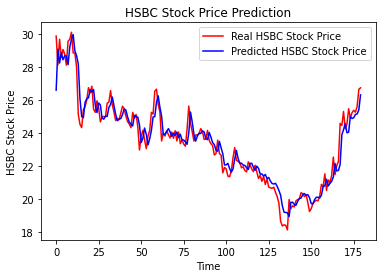

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real HSBC Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted HSBC Stock Price')
plt.title('HSBC Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('HSBC Stock Price')
plt.legend()
plt.show()

### Plotting train,test and prediction data

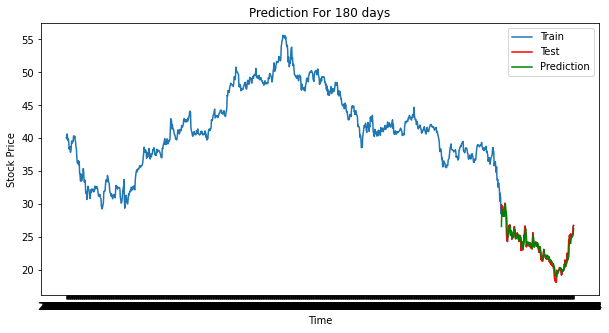

In [ ]:
pred=pd.DataFrame(predicted_stock_price)
plt.figure(figsize=(10, 5))
plt.plot(dataset_train['Date'], dataset_train['Close'],label='Train')
plt.plot(dataset_test['Date'], dataset_test['Close'], label='Test',color='r')
plt.plot(dataset_test['Date'], predicted_stock_price, label='Prediction',color='g')
plt.title("Prediction For 180 days")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend(loc='best')
plt.show()

In [ ]:
pred

,0
0,26.608925
1,29.102072
2,28.255751
3,28.882040
4,28.456137
...,...
175,24.930998
176,25.134912
177,25.159018
178,25.409838


### Evaluating the model

In [ ]:
from sklearn import metrics

In [ ]:
R_Score =metrics.r2_score(dataset_test['Close'],predicted_stock_price)

In [ ]:
#R_Score = metrics.mean_squared_error(testY[0], testPredict[:,0]) ** .5
print('Test Score: %.2f Accuracy' % (R_Score))


Test Score: 0.92 Accuracy
